In [78]:
## Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics ## mean_absolute_error,r2_score,mean_sq_error
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

import scipy
from scipy import stats

##
import exploratory_data_analysis.eda_functions as eda

import warnings as cuidado
cuidado.filterwarnings('ignore')


## Notes:

### Plan, Analyze, Construct and Execute.

1. Build a multiple linear regression model.

 - EDA.
    - Data source: **NYC Taxi and Limousine Commission (New York City TLC)**
    - Stakeholders: private.
    - Understand variables data types and distributions.
    - Identify missing or invalid data, make appropiate transformations.
    - Identify **outliers**
        - Exclucion/Inclucion.
        - Subtitude extreme data with average data.
        - Remove values greater than 3 std.
        - Plots.
        - Check for multicollinearity between predictors and distributions.
        
        (**Statistical Inferences can be made here, and some just can not**).
        - Feature engineer.
        - corr(method=pearson).
 - Model building and evaluation.
    - Pre-process.
        - Split data into independent and dependent variables.
        - One hot encode. (pd.get_dummies, OneHotEncode)
        - Normalize, scale
        - Split into train and test
        - LinearRegression()
        - **Train model**, use model with train data, make predictions with test data
        - Analyze, RR, MAE, MSE, RMSE
        - **Test model**, calculate same metrics with test data.
        - Write paragraph comparing the model train and test.
        - Observe residuals, actual and predicted values (also the multi-lineal-regression assumptions).
    
 - Interpreting results.

   

# Section 1.EDA
---
 - EDA.
    - Data source: **NYC Taxi and Limousine Commission (New York City TLC)**
    - Understand variables data types and distributions.
    - Identify missing or invalid data, make appropiate transformations.
    - Identify **outliers**
        - Exclucion/Inclucion.
        - Subtitude extreme data with average data.
        - Remove values greater than 3 std.
        - Plots.
        - Check for multicollinearity between predictors and distributions.
        
        (**Statistical Inferences can be made here, and some just can not**).
        - Feature engineer.
        - corr(method=pearson).

In [79]:
## Defining the path where the data is located locally, also views to display
## and the plots display.
path = '/content/drive/MyDrive/backups/2017_Yellow_Taxi_Trip_Data.csv'
path2 = '2017_Yellow_Taxi_Trip_Data.csv'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [80]:
## Defining the data and making a copy of it, and new column names
df  = pd.read_csv(path2)

new_column_names = ['unnamed', 'vendorID', 'pickup_dt',
       'dropoff_dt', 'psgr_count', 'distance',
       'ratecodeID', 'store_and_fwd_flag', 'pickUpLocId', 'dOffLocID',
       'paymenType', 'fareAmnt', 'extra', 'mtaTax', 'tip',
       'tollsAmount', 'improvementSrchrg', 'totalAmount']

## Rename columns with list
df.set_axis(new_column_names, axis=1,inplace=True)


df1 = df.copy()

In [81]:
## Metadata, that includes the data types
## number of observations by columns.
df1.info()
print('-----------')
print(f'Shape: {df1.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   unnamed             22699 non-null  int64  
 1   vendorID            22699 non-null  int64  
 2   pickup_dt           22699 non-null  object 
 3   dropoff_dt          22699 non-null  object 
 4   psgr_count          22699 non-null  int64  
 5   distance            22699 non-null  float64
 6   ratecodeID          22699 non-null  int64  
 7   store_and_fwd_flag  22699 non-null  object 
 8   pickUpLocId         22699 non-null  int64  
 9   dOffLocID           22699 non-null  int64  
 10  paymenType          22699 non-null  int64  
 11  fareAmnt            22699 non-null  float64
 12  extra               22699 non-null  float64
 13  mtaTax              22699 non-null  float64
 14  tip                 22699 non-null  float64
 15  tollsAmount         22699 non-null  float64
 16  impr

#### Validating data, observing missing or invalid values and stats estimates:

- After the following code we can say that the data is complete has no duplicates neither missing data. We still need to check the datetimes but later.

In [82]:
## Is there duplicated data?
not_duplicates = df1.shape == df1.drop_duplicates().shape
if not_duplicates == True:
    print('No Duplicates.')
else: print('Duplicated data.')

No Duplicates.


In [83]:
## Are there any 'nans'
eda.miss_df(df1)

,Total,Percent
unnamed,0,0.0
vendorID,0,0.0
improvementSrchrg,0,0.0
tollsAmount,0,0.0
tip,0,0.0
mtaTax,0,0.0
extra,0,0.0
fareAmnt,0,0.0
paymenType,0,0.0
dOffLocID,0,0.0


In [84]:
## Observing invalid
eda.get_invalid_values(df1).iloc[:,1:]

,nulls,invalids,unique_item
unnamed,0,0,"[24870114, 35634249, 106203690, 38942136, 3084..."
vendorID,0,0,"[2, 1]"
pickup_dt,0,0,"[03/25/2017 8:55:43 AM, 04/11/2017 2:53:28 PM,..."
dropoff_dt,0,0,"[03/25/2017 9:09:47 AM, 04/11/2017 3:19:58 PM,..."
psgr_count,0,0,"[6, 1, 2, 4, 5, 3, 0]"
distance,0,0,"[3.34, 1.8, 1.0, 3.7, 4.37, 2.3, 12.83, 2.98, ..."
ratecodeID,0,0,"[1, 2, 5, 3, 4, 99]"
store_and_fwd_flag,0,0,"[N, Y]"
pickUpLocId,0,0,"[100, 186, 262, 188, 4, 161, 79, 237, 234, 239..."
dOffLocID,0,0,"[231, 43, 236, 97, 112, 241, 114, 249, 237, 14..."


In [85]:
## Descriptive statistics, central tendency dispersion and percentiles.
#df1.describe().to_markdown()

|       |         unnamed |     vendorID |   psgr_count |    distance |   ratecodeID |   pickUpLocId |   dOffLocID |   paymenType |   fareAmnt |        extra |       mtaTax |         tip |   tollsAmount |   improvementSrchrg |   totalAmount |
|:------|----------------:|-------------:|-------------:|------------:|-------------:|--------------:|------------:|-------------:|-----------:|-------------:|-------------:|------------:|--------------:|--------------------:|--------------:|
| count | 22699           | 22699        |  22699       | 22699       | 22699        |    22699      |  22699      | 22699        | 22699      | 22699        | 22699        | 22699       |  22699        |       22699         |    22699      |
| mean  |     5.67585e+07 |     1.55624  |      1.64232 |     2.91331 |     1.04339  |      162.412  |    161.528  |     1.33689  |    13.0266 |     0.333275 |     0.497445 |     1.83578 |      0.312542 |           0.299551  |       16.3105 |
| std   |     3.27449e+07 |     0.496838 |      1.28523 |     3.65317 |     0.708391 |       66.6334 |     70.1397 |     0.496211 |    13.2438 |     0.463097 |     0.039465 |     2.80063 |      1.39921  |           0.0156727 |       16.0973 |
| min   | 12127           |     1        |      0       |     0       |     1        |        1      |      1      |     1        |  -120      |    -1        |    -0.5      |     0       |      0        |          -0.3       |     -120.3    |
| 25%   |     2.85206e+07 |     1        |      1       |     0.99    |     1        |      114      |    112      |     1        |     6.5    |     0        |     0.5      |     0       |      0        |           0.3       |        8.75   |
| 50%   |     5.67315e+07 |     2        |      1       |     1.61    |     1        |      162      |    162      |     1        |     9.5    |     0        |     0.5      |     1.35    |      0        |           0.3       |       11.8    |
| 75%   |     8.53745e+07 |     2        |      2       |     3.06    |     1        |      233      |    233      |     2        |    14.5    |     0.5      |     0.5      |     2.45    |      0        |           0.3       |       17.8    |
| max   |     1.13486e+08 |     2        |      6       |    33.96    |    99        |      265      |    265      |     4        |   999.99   |     4.5      |     0.5      |   200       |     19.1      |           0.3       |     1200.29   |

---

`unnamed`,some kind of ID, all values are unique, may not be of much value.

`vendorID`, another ID.

`tpep_pickup_datetime`, time stamp that will be transformed to dt.

`tpep_dropoff_datetime`, time stamp that will be transformed to dt.

`passenger_count`, seems fine, beside the 6 passangers, maybe a van.

`trip_distance`, 33 miles trip seems off, could be an outlier

`RatecodeID`, `[1, 2, 5, 3, 4, 99]` categorical

`store_and_fwd_flag`, yes, no. we need to check the binary count.

`PULocationID`, pick up location ID. We could obvserve trendy zones.

`DOLocationID`, drop off location. We could validate trip distances.

`payment_type`, We conclude that there is a statistically significant difference in the average total fare amount between customers who use credit cards and customers who use cash. in the AB test done earlier.
[a/b Test notebook](https://github.com/marioymario/GDAPC/blob/main/Statistics/ABTest/TLC_NYC_2017_STATS.ipynb)

`fare_amount`, is our target.

`extra`, categorical with 6 unique values.

`mta_tax`, categorical, 3 values.

`tip_amount`, continious. could be interesting to investigate.

`tolls_amount`, continious.

`improvement_surcharge`, categorical.

`total_amount`, continious.

#### Convert to date time

[timeDelta](https://numpy.org/doc/stable/reference/arrays.datetime.html)

[pd.dt](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [86]:
## At this point this is a string
df1['pickup_dt'][665], df1['dropoff_dt'][665]


('07/24/2017 6:18:39 AM', '07/24/2017 6:32:42 AM')

In [87]:
## Converting the pick up and drop off to datetime object.
df1['pickup_dt']   = pd.to_datetime(df1['pickup_dt'],
                                    format='%m/%d/%Y %I:%M:%S %p')
df1['dropoff_dt'] = pd.to_datetime(df1['dropoff_dt'],
                                   format='%m/%d/%Y %I:%M:%S %p')
## And, creating the new variable `duration`, for the trip duration.

df1['duration'] = ( df1['dropoff_dt'] - df1['pickup_dt'] ) / \
np.timedelta64(1,'m')

In [88]:
## Observing changes
df1.duration.describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [89]:
## Metadata, that includes the data types
## number of observations by columns.
df1.info()
print('-----------')
print(f'Shape: {df1.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   unnamed             22699 non-null  int64         
 1   vendorID            22699 non-null  int64         
 2   pickup_dt           22699 non-null  datetime64[ns]
 3   dropoff_dt          22699 non-null  datetime64[ns]
 4   psgr_count          22699 non-null  int64         
 5   distance            22699 non-null  float64       
 6   ratecodeID          22699 non-null  int64         
 7   store_and_fwd_flag  22699 non-null  object        
 8   pickUpLocId         22699 non-null  int64         
 9   dOffLocID           22699 non-null  int64         
 10  paymenType          22699 non-null  int64         
 11  fareAmnt            22699 non-null  float64       
 12  extra               22699 non-null  float64       
 13  mtaTax              22699 non-null  float64   

### Notes:

Couple of more transformations to make it a bit easier.
- Transforma objects to numerical
- Group by data type
- Drop unnamed
- DateTime data was validated already [EDA-notebook](https://github.com/marioymario/GDAPC/blob/main/DataIntoInsight/EDA/TLC_NYC_2017.ipynb)

In [90]:
## Dropping column unnamed.
df1.drop(['unnamed'], inplace=True, axis=1)

In [91]:
## LabelEncoder() to transform obj to numerical.
le = LabelEncoder()
df1['store_and_fwd_flag'] = le.fit_transform(df1['store_and_fwd_flag'])

In [92]:
## All the data is numerical, but we still have categorical
## features that need be observed. Seems like the max number of category
## is 216 and 152, def categories, but lots and not efficient to plot
## beside geolocation. other than that over 7 seems continious.

## Count of unique elements.
[len(df1[i].unique()) for i in df1.columns]

[2,
 22687,
 22688,
 7,
 1545,
 6,
 2,
 152,
 216,
 4,
 185,
 6,
 3,
 742,
 38,
 3,
 1369,
 3026]

In [93]:
## Locations uniques
print(len(df1['pickUpLocId'].unique()))
print(len(df1['dOffLocID'].unique()))

152
216


In [94]:
## Columns with equal or less than 7 categories
cat_col = []
for i in df1.columns:
    if len(df1[i].unique()) <= 7:
        cat_col.append(i)
print(cat_col)

['vendorID', 'psgr_count', 'ratecodeID', 'store_and_fwd_flag', 'paymenType', 'extra', 'mtaTax', 'improvementSrchrg']


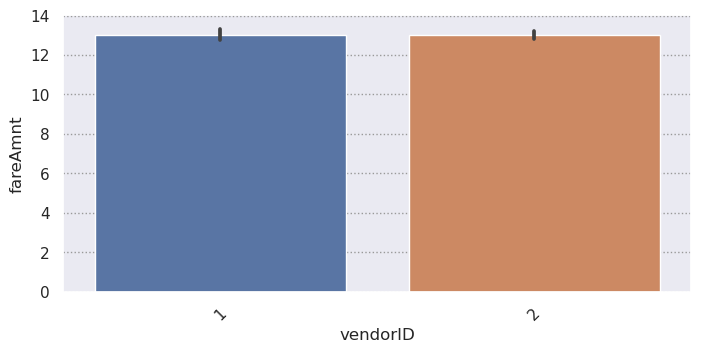

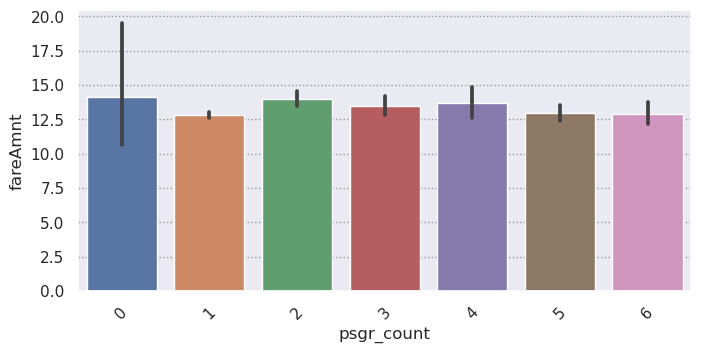

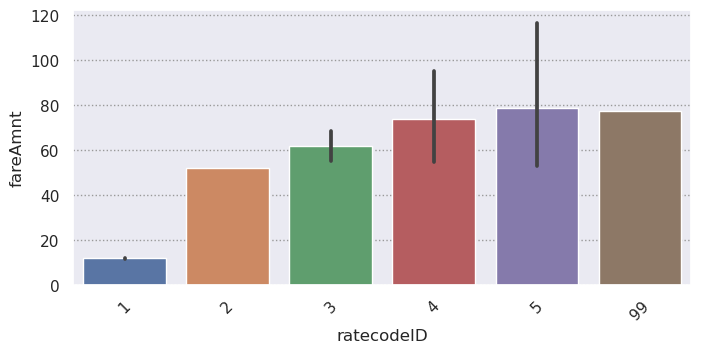

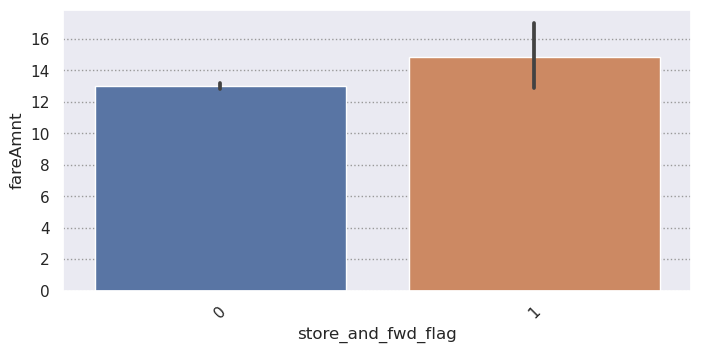

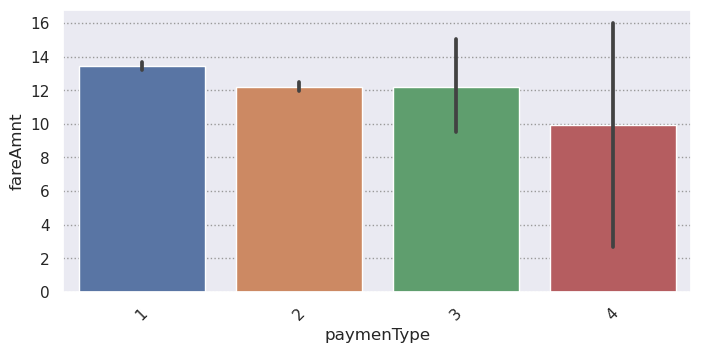

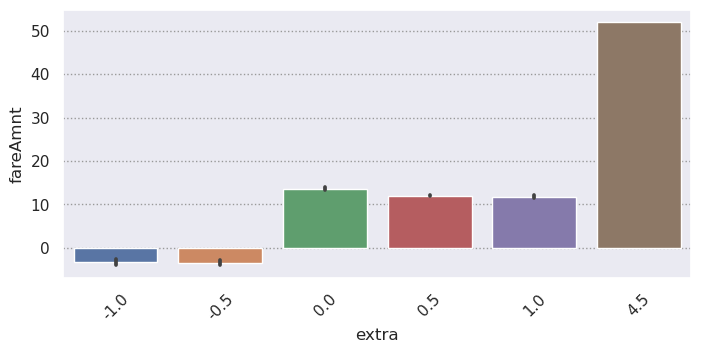

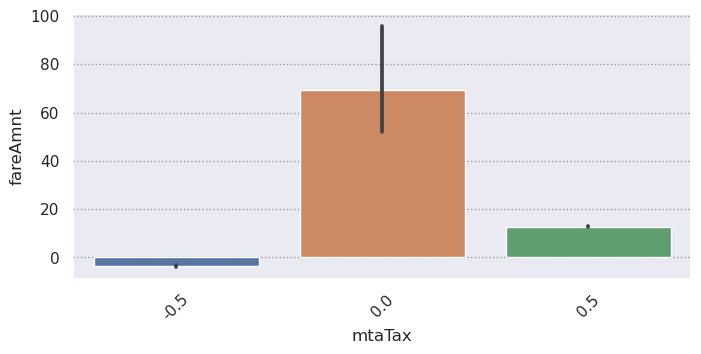

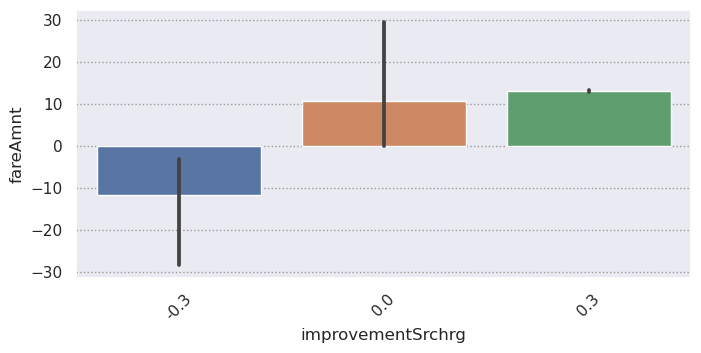

In [95]:
## Observing distributions respective to the FareAmnt
for cat in cat_col:
    plt.figure(figsize = (8.48,5)) #18, 8
    sns.barplot(x=cat, y='fareAmnt', data=df1);
    plt.xticks(rotation=45)
    plt.tight_layout(pad=5.0)
    plt.show()

In [96]:
## More distributions of the continious variables
## Selecting from all columns what is different
## from the cat_col and datetime objects.
continious = df1.columns ^ cat_col ^ ['dOffLocID','dropoff_dt', 'pickUpLocId', 'pickup_dt']
continious

Index(['distance', 'duration', 'fareAmnt', 'tip', 'tollsAmount',
       'totalAmount'],
      dtype='object')

In [ ]:
'''
Make a loop that goes thru the column lis col
display side by side sns.displot() on left and 
display the sns.boxplot on the right side.
the columns are the folumns of the dataframe df
in pandas.
'''

In [ ]:
## Histograms
for col in continious:
    plt.figure(figsize = (8.48,5))
    sns.distplot(df1[col], kde=True, fit=scipy.stats.norm , color='Blue')
    plt.title(col)

NameError: name 'continious' is not defined

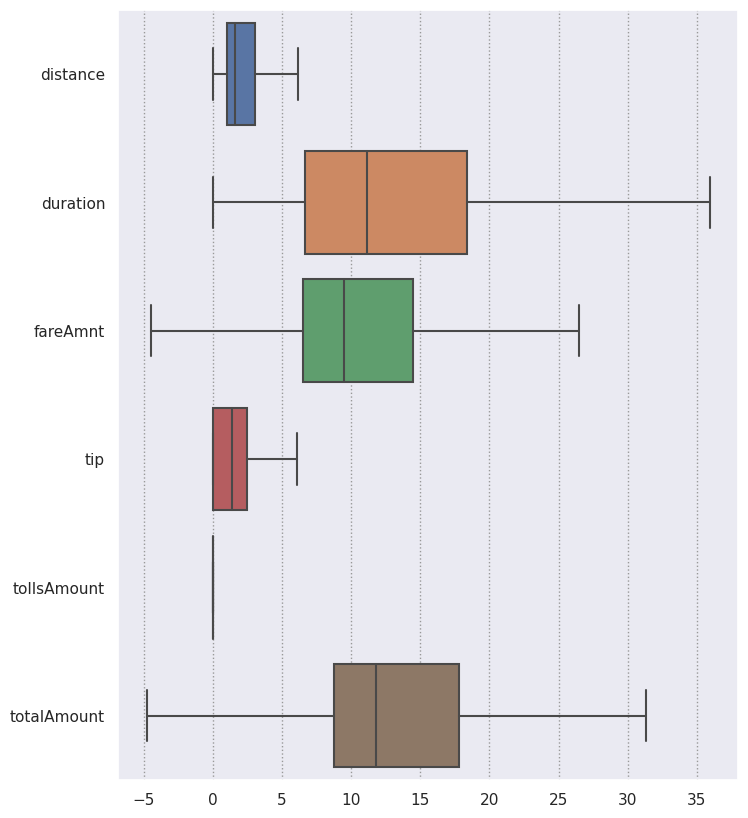

In [98]:
## Box plots
plt.figure(figsize = (8,10))
sns.boxplot(data=df1[continious], orient='h', showfliers=False );

- Identify **outliers**
    - Exclucion/Inclucion.
    - Subtitude extreme data with average data.
    - Remove values greater than 3 std.
    - Plots.

1. All three variables contain outliers.

2. It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for `fare_amount` and `duration` definitely seem to have problematic outliers on the higher end.

3.  `trip_distance` seems okay.


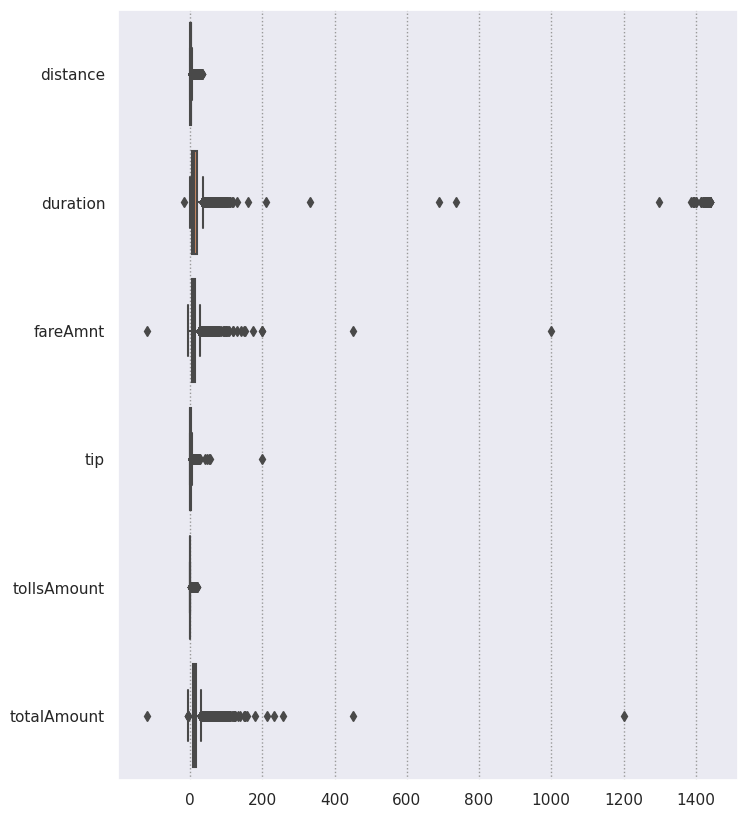

In [99]:
## Box plots with outliers
plt.figure(figsize = (8,10))
sns.boxplot(data=df1[continious], orient='h');

In [100]:
## Distances equal to zero...
## we could drop we could keep...
## very small pct.
print(f'{148 /df1.shape[0] * 100}%')
len(df1[df1['distance'] == 0.00])

0.6520111018106525%


148

### Notes:
- Lets observe `fare amount` our target


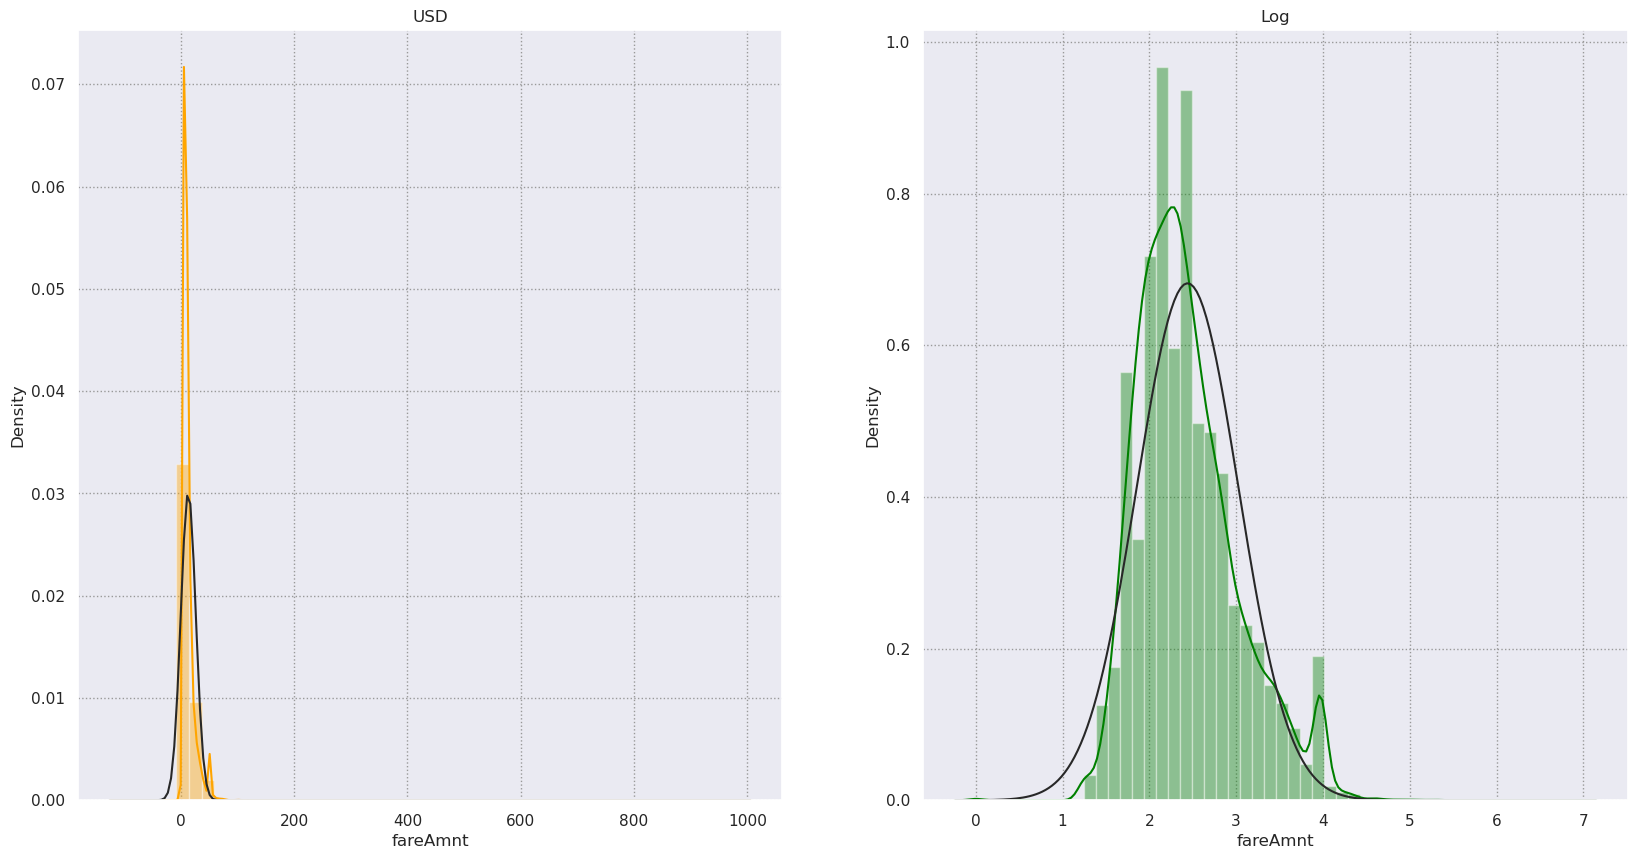

In [101]:
## compare dist to the log
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(df1['fareAmnt'], kde=True, fit=scipy.stats.norm , color='Orange')
plt.title('USD')
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(df1['fareAmnt']), kde=True, fit=scipy.stats.norm, color='Green') ## fits is deprecated, still good to demo.
plt.title('Log');

In [102]:
eda.empirical(df1, 'fareAmnt')

,fareAmnt,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.90,0.680,0.220
Frac of the values within +/- 2 SD from the mean,0.96,0.950,0.010
Frac of the values within +/- 3 SD from the mean,0.99,0.997,0.007


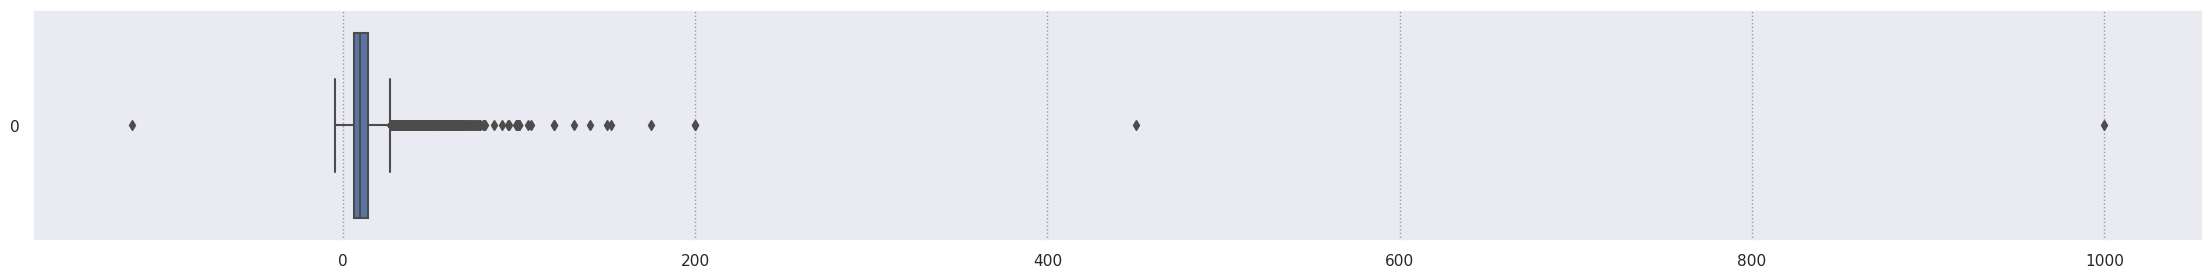

In [103]:
## Extreme outliers, and negative monetary values...
## Not the way.
plt.figure(figsize = (28, 3))
sns.boxplot(data=df1['fareAmnt'], orient='h');

* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly \$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \$8. The standard formula of `Q3 + (1.5 * IQR)` yields \$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of $62.50. gracias.

In [104]:
# Impute values less than $0 with 0
df1.loc[df1['fareAmnt'] < 0, 'fareAmnt'] = 0
df1['fareAmnt'].min()

0.0

In [105]:
def outlier_imputer(dataframe, column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based \
    on their interquartile range.

    Arguments:
        dataframe: A pandas df.
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper \
    threshold value.
    '''
    df = dataframe.copy()
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        dff = df.copy()
        return dff

In [106]:
## Imputing the max value as Q3 + (6 * IQR)
df2 = pd.DataFrame()
df2 = outlier_imputer(df1, ['fareAmnt'], 6)

fareAmnt
q3: 14.5
upper_threshold: 62.5


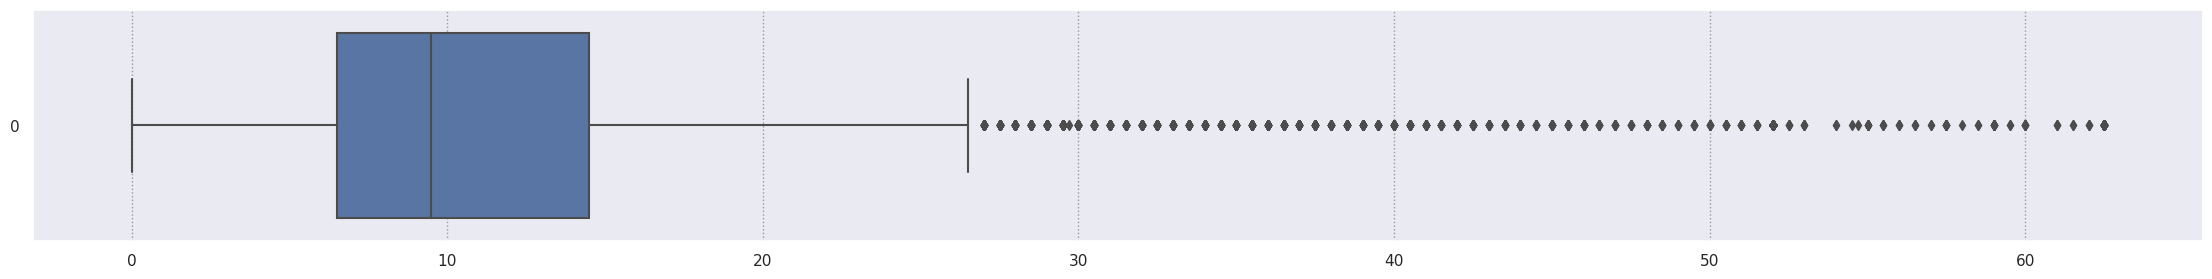

In [107]:
## Validation, this is the way.
plt.figure(figsize = (28, 3))
sns.boxplot(data=df2['fareAmnt'], orient='h');

In [108]:
## obtaining the log of the fareAmnt
df2['log'] = np.log1p(df2['fareAmnt'])

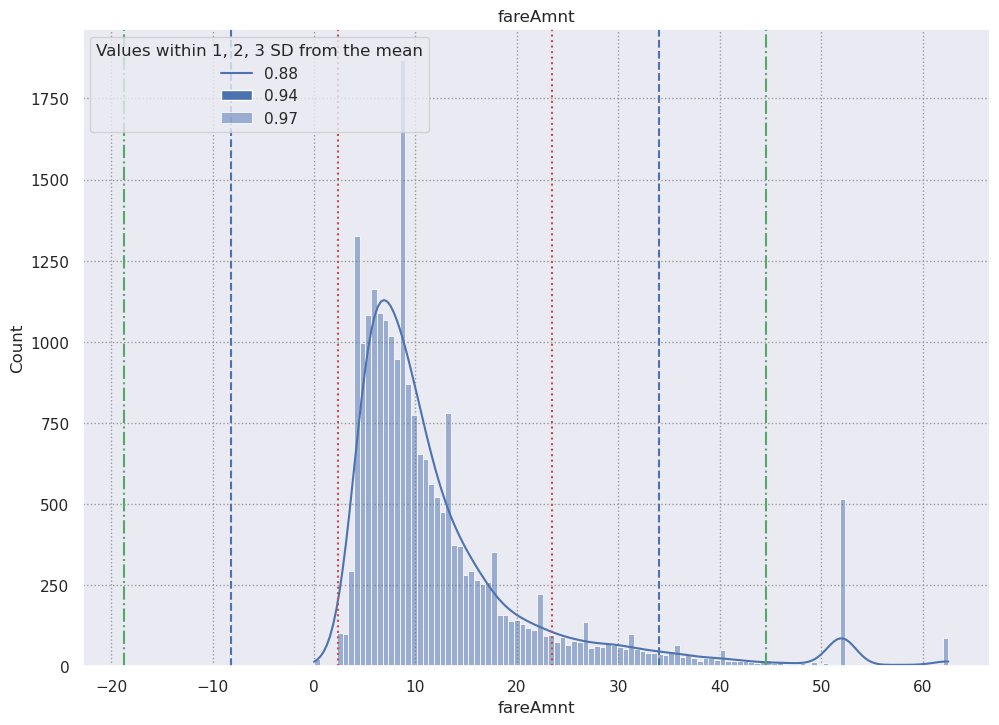

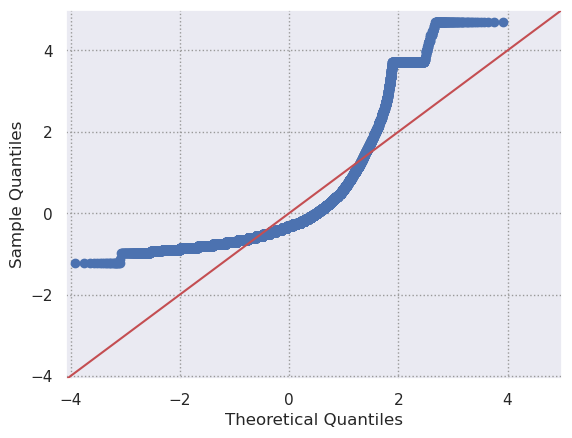

In [109]:
eda.distribution(df2, 'fareAmnt')

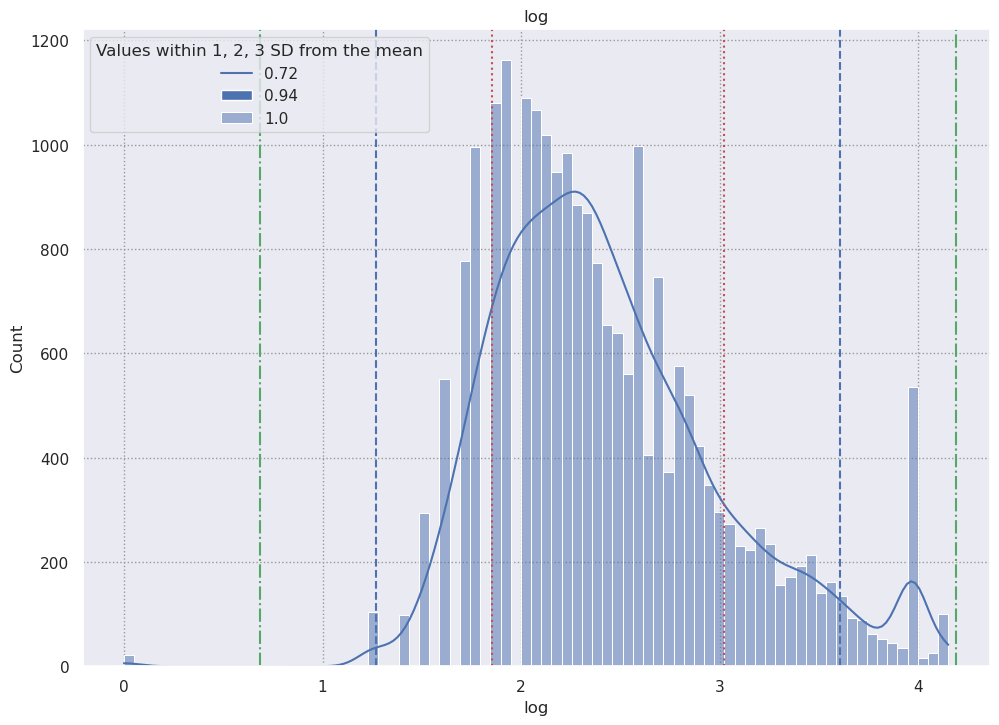

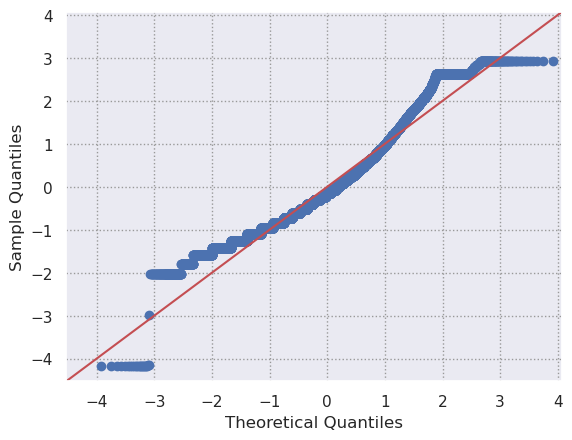

In [110]:
eda.distribution(df2, 'log')

### Notes:
- Lets observe `duration`

In [111]:
df2['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

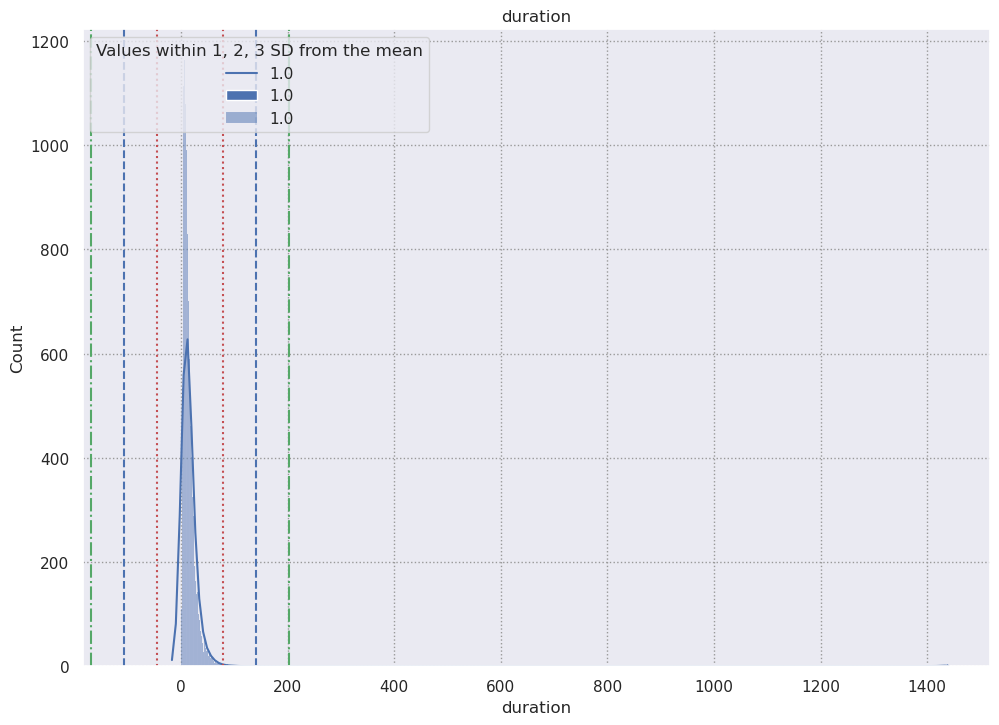

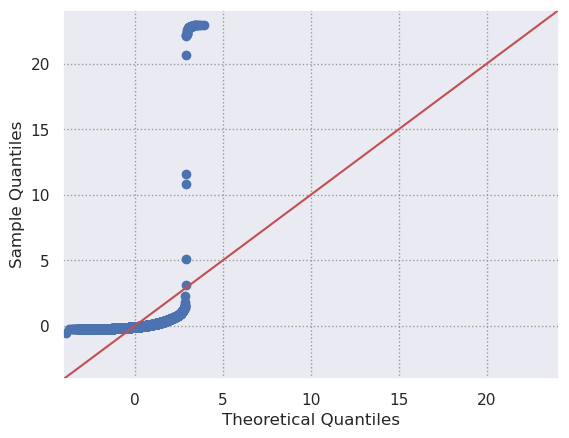

In [112]:
eda.distribution(df2, 'duration')

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [113]:
# Impute a 0 for any negative values
df2.loc[df2['duration'] < 0, 'duration'] = 0
df2['duration'].min()

0.0

In [114]:
df3 = pd.DataFrame()
# Impute the high outliers
df3 = outlier_imputer(df2, ['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333


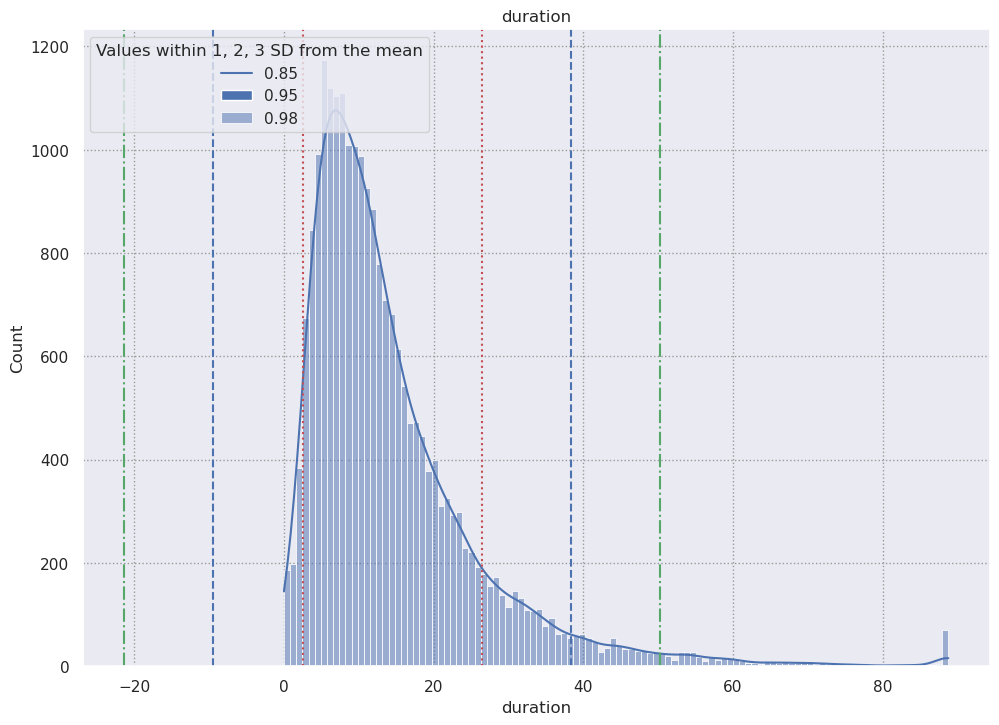

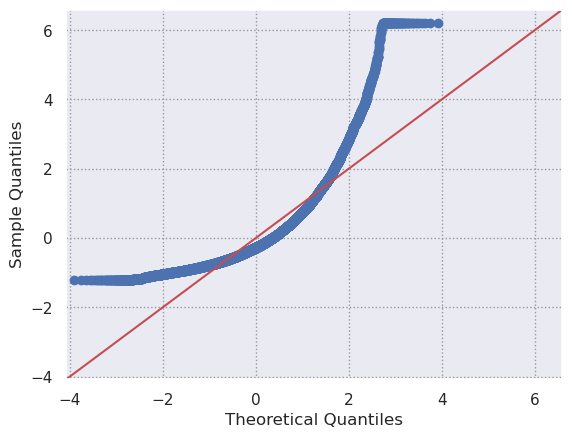

In [115]:
eda.distribution(df3, 'duration')

### Feature engineer.
#### Create `mean_distance` column

**When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you do know to generalize about ones you do not know.**

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |

In [116]:
## Create `pickup_dropoff` column
df3['up_off'] = df3['pickUpLocId'].astype('string') + ' ' + df3['dOffLocID'].astype('string')
df3['up_off'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: up_off, dtype: string

Now, we use a groupby() statement to group each row by the new `up_off` column, compute the mean, and capture the values only in the distance column. Assign the results to a variable named grouped.

each unique trip has a mean after aplying the formula.

In [117]:
grouped = df3.groupby('up_off').mean(numeric_only=True)[['distance']]
grouped[:5]

,distance
up_off,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [118]:
## 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

## 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [119]:
## 1. Create a mean_distance column that is a copy of the
## pickup_dropoff helper column
df3['mean_distance'] = df3['up_off']

## 2. Map `grouped_dict` to the `mean_distance` column
df3['mean_distance'] = df3['mean_distance'].map(grouped_dict)

## Confirm that it worked
df3[(df3['pickUpLocId']==100) & (df3['dOffLocID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [120]:
grouped = df3.groupby('up_off').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df3['mean_duration'] = df3['up_off']
df3['mean_duration'] = df3['mean_duration'].map(grouped_dict)

# Confirm that it worked
df3[(df3['pickUpLocId']==100) & (df3['dOffLocID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


### Observing the time variables to obtain more info.

In [121]:
##
df3['week']    = df3['pickup_dt'].dt.strftime('%V')
df3['month']   = df3['pickup_dt'].dt.strftime('%m')
df3['quarter'] = df3['pickup_dt'].dt.to_period('Q').dt.strftime('%q')
df3['day']     = df3['pickup_dt'].dt.strftime('%A')
df3['hour']    = df3['pickup_dt'].dt.strftime('%H')

        fareAmnt
month           
01     12.551077
02     12.464500
03     12.845388
04     12.686974
05     13.324893
06     13.238035
07     12.578256
08     12.875296
09     12.925606
10     12.917908
11     13.211612
12     13.101932


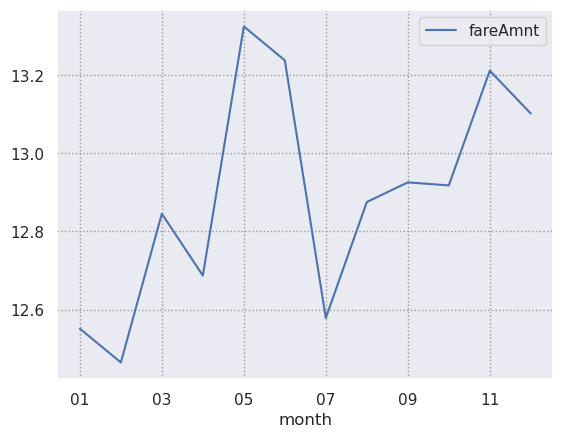

In [122]:
## the average total amount per month
print(df3[['month', 'fareAmnt']].groupby(['month']).mean())
df3[['month', 'fareAmnt']].groupby(['month']).mean().plot(kind='line');

       mean_distance
month               
01          2.818566
02          2.820332
03          2.891425
04          2.900348
05          2.988563
06          2.983474
07          2.856159
08          2.981717
09          2.926146
10          2.920201
11          2.962958
12          2.906225


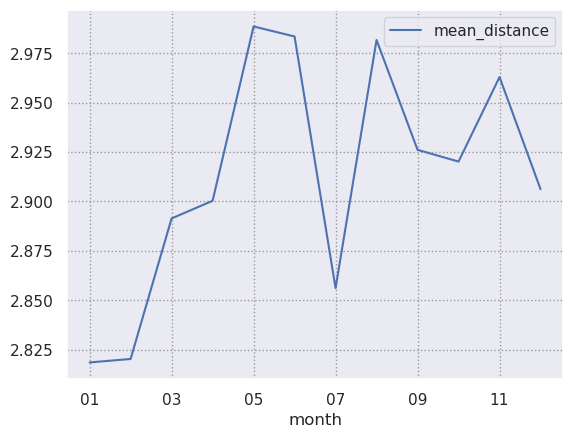

In [123]:
## the average total amount per month
print(df3[['month', 'mean_distance']].groupby(['month']).mean())
df3[['month', 'mean_distance']].groupby(['month']).mean().plot();

       mean_duration
month               
01         14.097345
02         14.180332
03         14.058970
04         14.287957
05         14.924673
06         14.776020
07         14.424234
08         14.594586
09         14.380449
10         14.427034
11         14.765500
12         14.629060


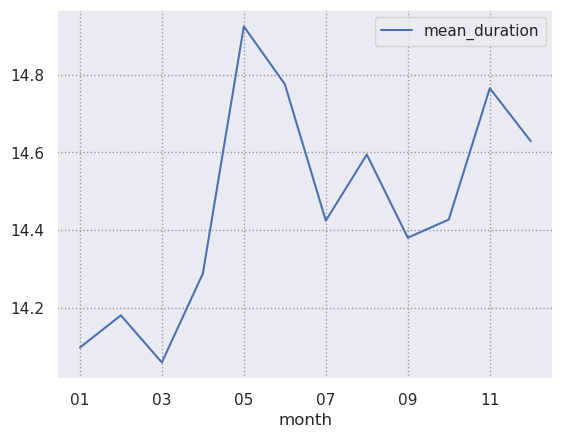

In [124]:
print(df3[['month', 'mean_duration']].groupby(['month']).mean())
df3[['month', 'mean_duration']].groupby(['month']).mean().plot();

       fareAmnt
hour           
00    13.088874
01    11.801905
02    12.174870
03    13.404181
04    14.636170
05    15.387234
06    12.973948
07    11.519253
08    12.191176
09    12.504946
10    12.629327
11    13.209559
12    12.848743
13    13.031943
14    13.595997
15    13.764781
16    13.568905
17    13.478207
18    13.153899
19    12.015825
20    12.177382
21    12.745511
22    12.925804
23    13.290755


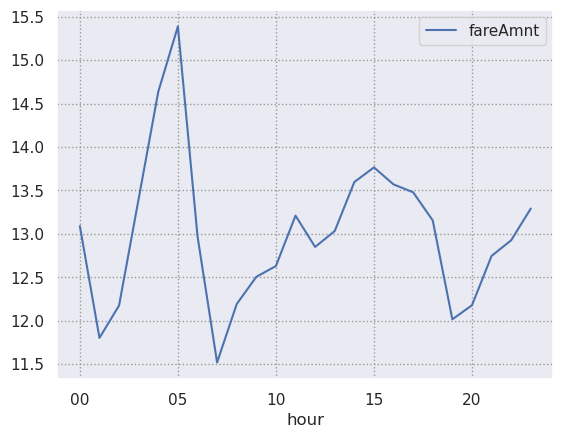

In [125]:
print(df3[['hour', 'fareAmnt']].groupby(['hour']).mean())
df3[['hour', 'fareAmnt']].groupby(['hour']).mean().plot();

### Rush Hour
Rush hour in New York City is typically defined as the period of time when traffic is at its heaviest. It occurs twice a day, in the morning and evening, as people commute to and from work.

Morning rush hour: typically from 7:30am to 9:30am
Evening rush hour: typically from 4:30pm to 7:00pm
The exact times of rush hour can vary depending on the day of the week, the time of year, and the location in the city. For example, rush hour traffic is usually worse on weekdays than on weekends, and it can be especially bad during the summer months when more people are traveling.

thanks
[Bard](https://bard.google.com/)

Based on my experience and other resources the times will be:

- Between pass 6am till 9:59am and
- Between pass 4pm till 7:59pm.

In [126]:
## rush hour
df3['RH'] = df3['hour'].copy()

## If is Saturday or Sunday impute a zero.
df3.loc[ df3[ 'day' ].isin([ 'Saturday', 'Sunday' ]), 'RH'] = 0

In [127]:
## course function, thankful for rush_hourizer.

def rush_hourizer(hour):
    if 6 <= int(hour['RH']) < 10:
        val = 1
    elif 16 <= int(hour['RH']) < 20:
        val = 1
    else:
        val = 0
    return val

In [128]:
# Apply the `rush_hourizer()` function to the new column
df3['RH'] = df3.apply(rush_hourizer, axis=1)
df3.head()

,vendorID,pickup_dt,dropoff_dt,psgr_count,distance,ratecodeID,store_and_fwd_flag,pickUpLocId,dOffLocID,paymenType,fareAmnt,extra,mtaTax,tip,tollsAmount,improvementSrchrg,totalAmount,duration,log,up_off,mean_distance,mean_duration,week,month,quarter,day,hour,RH
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,0,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,2.639057,100 231,3.521667,22.847222,12,03,1,Saturday,08,0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,0,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,2.833213,186 43,3.108889,24.470370,15,04,2,Tuesday,14,0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,0,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,2.014903,262 236,0.881429,7.250000,50,12,4,Friday,07,1
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,0,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.068053,188 97,3.700000,30.250000,18,05,2,Sunday,13,0
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,0,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,2.862201,4 112,4.435000,14.616667,15,04,2,Saturday,23,0


## Scatter plot

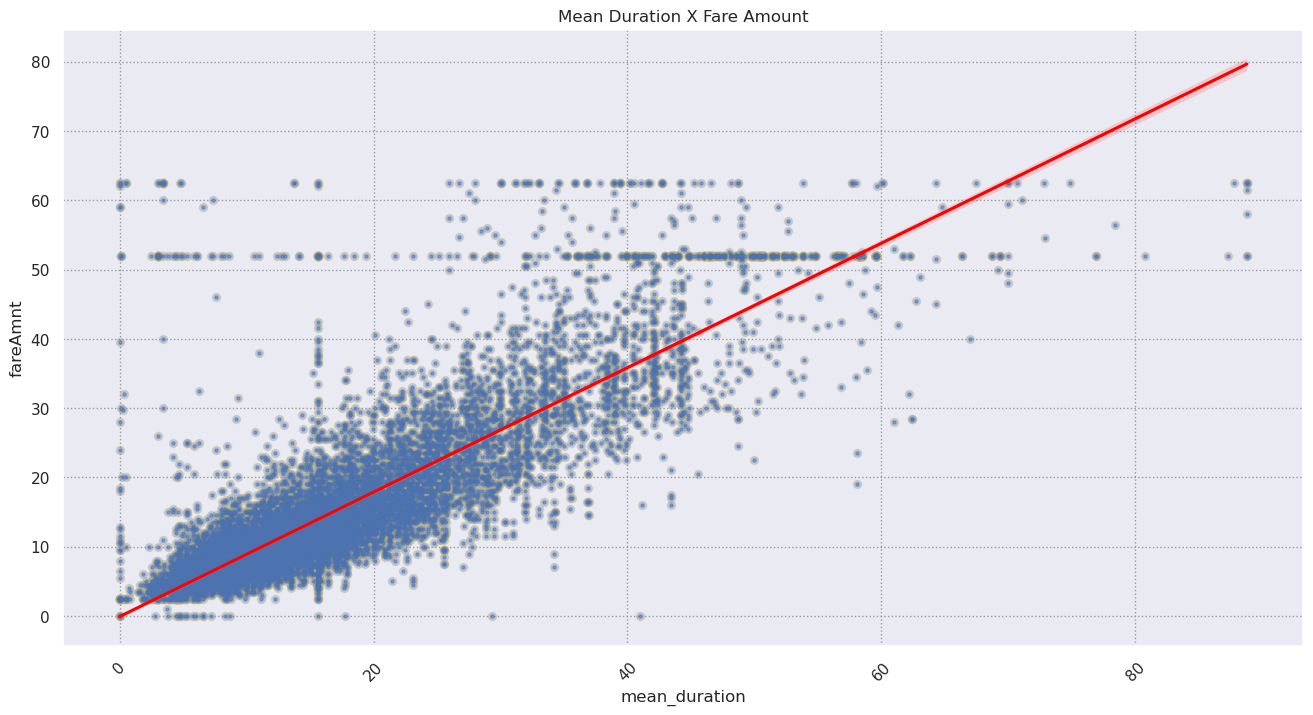

In [129]:
colors = ('b')
colors2 = ('r')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df3['mean_duration'], df3['fareAmnt'], c=colors, alpha=0.3, edgecolor='y')
sns.regplot(x=df3['mean_duration'], y=df3['fareAmnt'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
ax.set_xlabel('mean_duration')
ax.set_ylabel('fareAmnt')
ax.set_title('Mean Duration X Fare Amount')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Notes:
**outlier_imputer has created the top horizontal line at around 62
the other one seems to be a deal or something like a flat rate at
around 52.**

... All trips between Manhattan and John F. Kennedy International Airport are charged a flat rate of 52. All trips to Newark Airport are charged the metered rate plus 17.50. The passenger also has to pay for any portion of the trip where the cab is driven on a toll road. The taxi must have an E-ZPass tag, and passengers ...

[wiki-fares](https://en.wikipedia.org/wiki/Taxis_of_New_York_City)


---

# Section 2 model
 - Model building and evaluation.
    - Pre-process.
        - Split data into independent and dependent variables.
        - One hot encode. (pd.get_dummies, OneHotEncode)
        - Normalize, scale
        - Split into train and test
        - LinearRegression()
        - **Train model**, use model with train data, make predictions with test data
        - Analyze, RR, MAE, MSE, RMSE
        - **Test model**, calculate same metrics with test data.
        - Write paragraph comparing the model train and test.
        - Observe residuals, actual and predicted values (also the multi-lineal-regression assumptions).
    
 - Interpreting results.

In [130]:
## Correlation
df3.corr(method='pearson')['fareAmnt'].sort_values(ascending=False)

fareAmnt              1.000000
log                   0.928824
distance              0.924626
mean_distance         0.910185
mean_duration         0.859105
totalAmount           0.845757
duration              0.831036
tollsAmount           0.616719
tip                   0.542246
ratecodeID            0.222102
extra                 0.097632
improvementSrchrg     0.029979
psgr_count            0.014942
store_and_fwd_flag    0.012279
vendorID              0.001045
RH                   -0.020075
paymenType           -0.049516
pickUpLocId          -0.072600
dOffLocID            -0.088849
mtaTax               -0.141438
Name: fareAmnt, dtype: float64

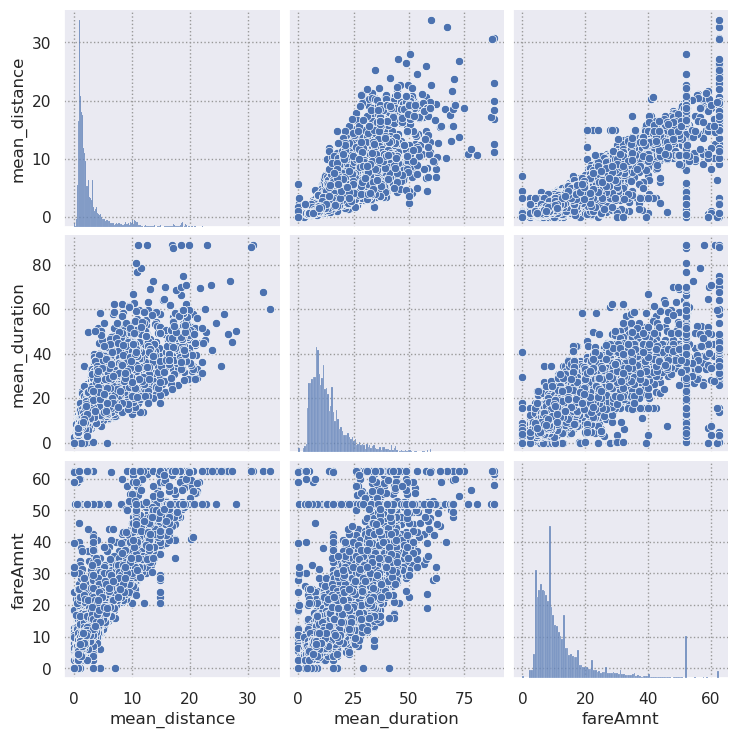

In [131]:
sns.pairplot(df3[['mean_distance', 'mean_duration', 'fareAmnt']]);

`mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

In [132]:
## Spliting data

X = df3[['mean_distance', 'mean_duration', 'RH', 'vendorID', 'psgr_count']]
y = df3[['fareAmnt']]

In [133]:
# Convert VendorID to string
X['VendorID'] = X['vendorID'].astype('string')

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,mean_distance,mean_duration,RH,vendorID,psgr_count,VendorID
0,3.521667,22.847222,0,2,6,2
1,3.108889,24.470370,0,1,1,1
2,0.881429,7.250000,1,1,1,1
3,3.700000,30.250000,0,2,1,2
4,4.435000,14.616667,0,2,1,2


In [134]:
## Standardize the X variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5
count,2.269900e+04,2.269900e+04,2.269900e+04,2.269900e+04,2.269900e+04,2.269900e+04
mean,-1.076010e-16,-1.390970e-16,2.312789e-16,-1.375387e-15,4.496259e-16,-1.375387e-15
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-8.185960e-01,-1.434481e+00,-6.495967e-01,-1.119576e+00,-1.277868e+00,-1.119576e+00
25%,-5.348016e-01,-6.377612e-01,-6.495967e-01,-1.119576e+00,-4.997803e-01,-1.119576e+00
50%,-3.634010e-01,-2.880644e-01,-6.495967e-01,8.931955e-01,-4.997803e-01,8.931955e-01
75%,5.684657e-02,2.838210e-01,1.539417e+00,8.931955e-01,2.783070e-01,8.931955e-01
max,8.712400e+00,7.372786e+00,1.539417e+00,8.931955e-01,3.390656e+00,8.931955e-01


In [135]:
## Spliting data 80%/20%

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

### Linear Regression
[LR](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [136]:
lr = LinearRegression()
results = lr.fit(X_test, y_test)

In [137]:
results.__dir__()

['fit_intercept',
 'normalize',
 'copy_X',
 'n_jobs',
 'positive',
 'n_features_in_',
 'coef_',
 '_residues',
 'rank_',
 'singular_',
 'intercept_',
 '__module__',
 '__doc__',
 '__init__',
 'fit',
 '__abstractmethods__',
 '_abc_impl',
 '_more_tags',
 '__dict__',
 '__weakref__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__',
 '_estimator_type',
 'score',
 '_decision_function',
 'predict',
 '_preprocess_data',
 '_set_intercept',
 '_get_param_names',
 'get_params',
 'set_params',
 '__getstate__',
 '__setstate__',
 '_get_tags',
 '_check_n_features',
 '_check_feature_names',
 '_validate_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_']

In [138]:
help(results.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, whe

In [139]:
## Evaluation on training data
resultados = {}
y_pred_train = lr.predict(X_train)

resultados['coeff_determination'] = lr.score(X_train, y_train)
resultados['R^2']  = metrics.r2_score(y_train, y_pred_train)
resultados['MAE']  = metrics.mean_absolute_error(y_train, y_pred_train)
resultados['MSE']  = metrics.mean_squared_error(y_train, y_pred_train)
resultados['RMSE'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

res = pd.DataFrame(resultados.items(), columns=['metric','result'])
res

,metric,result
0,coeff_determination,0.839273
1,R^2,0.839273
2,MAE,2.171632
3,MSE,17.953439
4,RMSE,4.237150


In [143]:
def metrics(X_train, X_test, y_train, y_test, lr):
    
    lr = lr
    resultados = {}
    y_pred_train = lr.predict(X_train)
    resultados['coeff_determination_train'] = lr.score(X_train, y_train)
    resultados['R^2_train']  = r2_score(y_train, y_pred_train)
    resultados['MAE_train']  = mean_absolute_error(y_train, y_pred_train)
    resultados['MSE_train']  = mean_squared_error(y_train, y_pred_train)
    resultados['RMSE_train'] = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    y_pred_test = lr.predict(X_test)
    resultados['coeff_determination_test'] = lr.score(X_test, y_test)
    resultados['R^2_test']  = r2_score(y_test, y_pred_test)
    resultados['MAE_test']  = mean_absolute_error(y_test, y_pred_test)
    resultados['MSE_test']  = mean_squared_error(y_test, y_pred_test)
    resultados['RMSE_test'] = np.sqrt(mean_squared_error(y_test, y_pred_test))

    res = pd.DataFrame(resultados.items(), columns=['metric','result'])
    return(res)

In [144]:
metrics(X_train, X_test, y_train, y_test, lr)

,metric,result
0,coeff_determination_train,0.839273
1,R^2_train,0.839273
2,MAE_train,2.171632
3,MSE_train,17.953439
4,RMSE_train,4.237150
5,coeff_determination_test,0.868842
6,R^2_test,0.868842
7,MAE_test,2.112619
8,MSE_test,14.263007
9,RMSE_test,3.776640


### Getting actual,predicted, and residual for the testing set, and store them as columns in a results dataframe.

In [145]:
# Create a `results` dataframe
y_pred_test = lr.predict(X_test)
results = pd.DataFrame(data={'actual': y_test['fareAmnt'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.346025,1.653975
18134,28.0,16.365952,11.634048
4655,5.5,6.587892,-1.087892
7378,15.5,16.309853,-0.809853
13914,9.5,10.291103,-0.791103


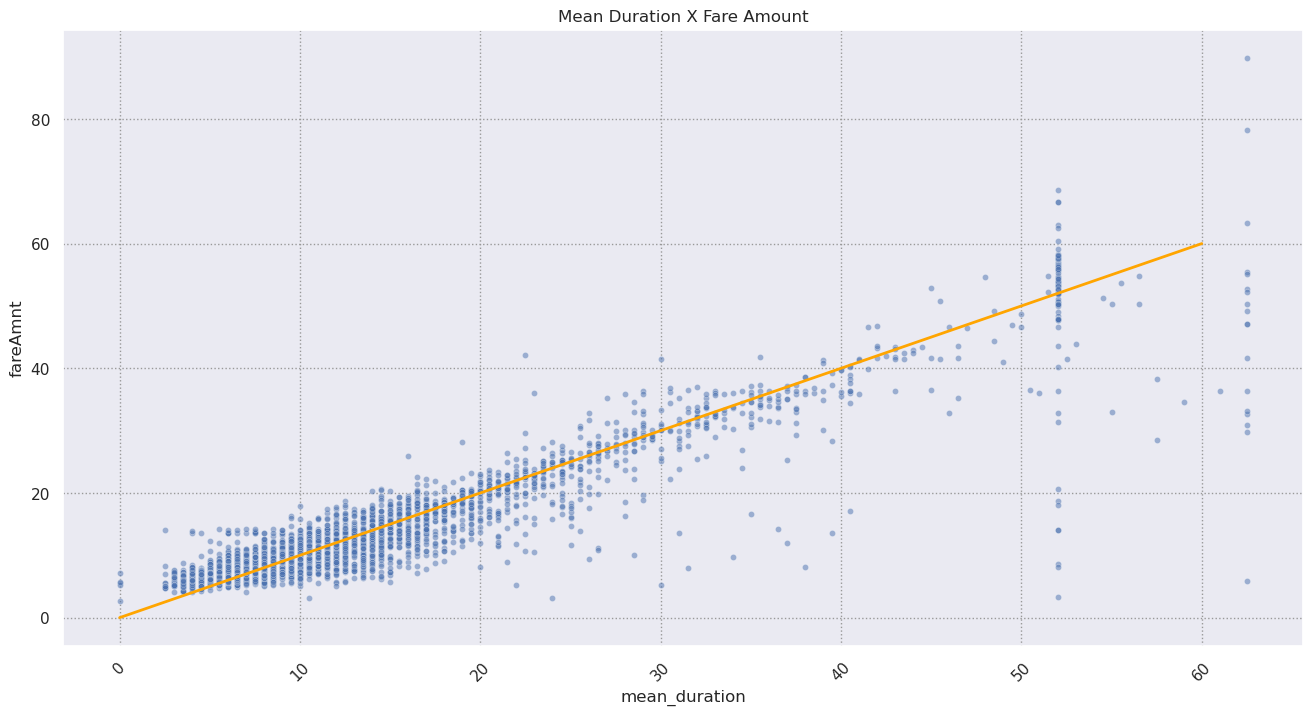

In [158]:
colors = ('b')
colors2 = ('r')

fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)

plt.plot([0,60], [0,60], c='orange', linewidth=2)
ax.set_xlabel('mean_duration')
ax.set_ylabel('fareAmnt')
ax.set_title('Mean Duration X Fare Amount')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Checking the Assumptions:

Multiple linear regression assumptions

1. Linearity: Each predictor variable (Xi) is linearly related to the outcome variable (Y).

2. Normality: The errors are normally distributed.*

3. Independent Observations: Each observation in the dataset is independent.

4. Homoscedasticity: The variance of the errors is constant or similar across the model.*

5. The Data can not be multicollinear 

In [160]:
## Assumptions

eda.empirical(results, 'residual')

,residual,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.88,0.680,0.200
Frac of the values within +/- 2 SD from the mean,0.97,0.950,0.020
Frac of the values within +/- 3 SD from the mean,0.99,0.997,0.007


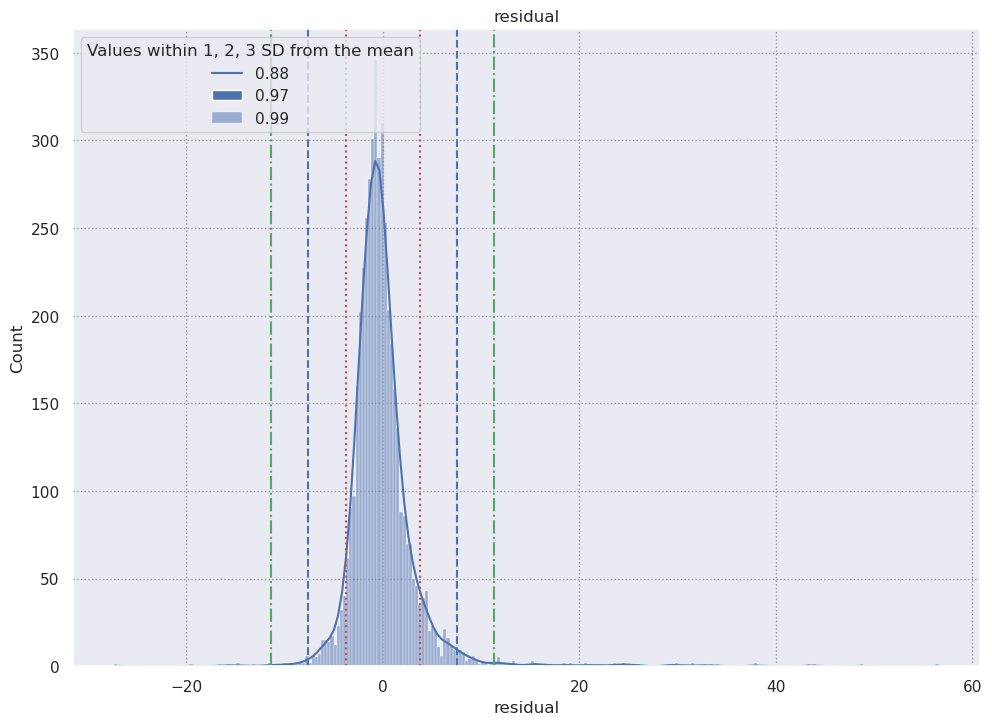

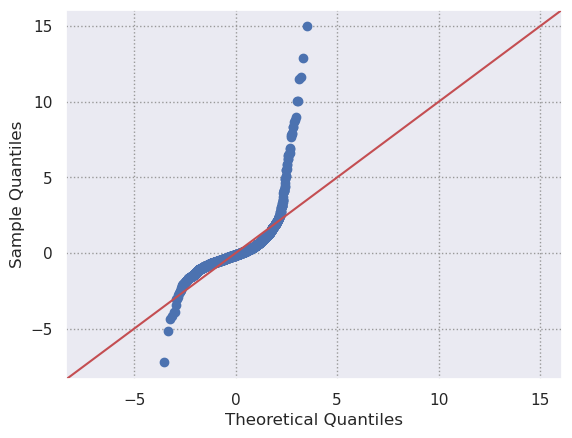

In [161]:
eda.distribution(results, 'residual')

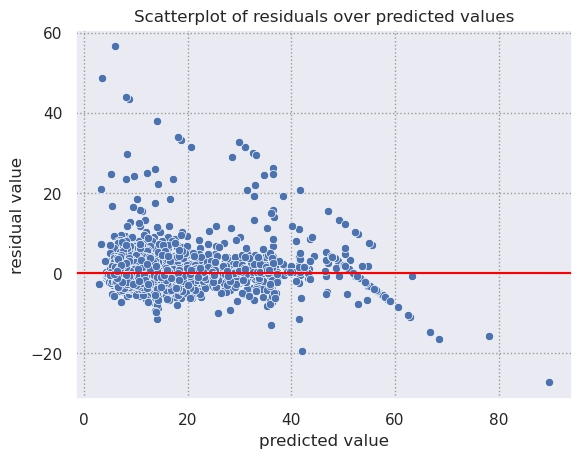

In [162]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

## lr.coef_

In [165]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients


,mean_distance,mean_duration,RH,vendorID,psgr_count,VendorID
0,7.288565,2.836004,0.221685,0.017375,0.021914,0.017375


## Predicting the whole data set

In [166]:
y_preds_full = lr.predict(X_scaled)

### 2. Impute ratecode 2 fare

The data dictionary says that the `RatecodeID` column captures the following information:

1 = standard rate
2 = JFK (airport)
3 = Newark (airport)
4 = Nassau or Westchester
5 = Negotiated fare
6 = Group ride

This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of `2` can be imputed with \$52, as this is a flat rate for JFK airport.

The other rate codes have some variation (not shown here, but feel free to check for yourself). They are not a fixed rate, so these fares will remain untouched.

Impute `52` at all predictions where `RatecodeID` is `2`.

In [170]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df3[['ratecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['ratecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['ratecodeID']==2].head()

,ratecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [171]:
## Performance

final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8917134158041321
MAE: 1.9671868212570265
MSE: 12.031796004798741
RMSE: 3.468687937073432


In [175]:
# Combine means columns with predictions column
nyc_preds_means = df3[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds
#nyc_preds_means.to_csv('nyc_preds_means', index=False)
nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.451207
1,24.470370,3.108889,15.907291
2,7.250000,0.881429,6.986168
3,30.250000,3.700000,18.813800
4,14.616667,4.435000,15.920931
5,11.855376,2.052258,10.349557
6,59.633333,12.830000,46.263498
7,26.437500,4.022500,18.886970
8,7.873457,1.019259,7.028512
9,10.541111,1.580000,8.857443


# NOTES

This notebook was designed for teaching purposes. As such, there are some things to note that differ from best practice or from how tasks are typically performed.

1.  When the `mean_distance` and `mean_duration` columns were computed, the means were calculated from the entire dataset. These same columns were then used to train a model that was used to predict on a test set. A test set is supposed to represent entirely new data that the model has not seen before, but in this case, some of its predictor variables were derived using data that *was* in the test set.</br></br>
This is known as **<u>data leakage</u>**. Data leakage is when information from your training data contaminates the test data. If your model has unexpectedly high scores, there is a good chance that there was some data leakage.
</br></br>
To avoid data leakage in this modeling process, it would be best to compute the means using only the training set and then copy those into the test set, thus preventing values from the test set from being included in the computation of the means. This would have created some problems because it's very likely that some combinations of pickup-dropoff locations would only appear in the test data (not the train data). This means that there would be NaNs in the test data, and further steps would be required to address this.
</br></br>
In this case, the data leakage improved the R<sup>2</sup> score by ~0.03.
</br></br>
2. Imputing the fare amount for `RatecodeID 2` after training the model and then calculating model performance metrics on the post-imputed data is not best practice. It would be better to separate the rides that did *not* have rate codes of 2, train the model on that data specifically, and then add the `RatecodeID 2` data (and its imputed rates) *after*. This would prevent training the model on data that you don't need a model for, and would likely result in a better final model. However, the steps were combined for simplicity.
</br></br>
3. Models that predict values to be used in another downstream model are common in data science workflows. When models are deployed, the data cleaning, imputations, splits, predictions, etc. are done using modeling pipelines. Pandas was used here to granularize and explain the concepts of certain steps, but this process would be streamlined by machine learning engineers. The ideas are the same, but the implementation would differ. Once a modeling workflow has been validated, the entire process can be automated, often with no need for pandas and no need to examine outputs at each step. This entire process would be reduced to a page of code.